$$
\tilde{x}[n] = ...
$$

means that it is periodic

Continuos it time to discrete in time, will become periodic in frequency

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import sympy as sp
import numpy as np
import math

In [2]:
r1 = 1326
r2 = 149207.75914865188
c = 2 * 10**(-9)
q = 5
w0 = 2 * math.pi * 8 * 10**3
expTop = -(1/(r1*c))*1j*w0
expBut = (1j*w0)**2+(w0/q)*1j*w0+w0**2
#expBut = (1j*w0)**2+(3/(c*r2))*1j*w0+(2/(r1*r2*c**2))
exp = expTop/expBut
exp

(-37.50823508010354-0j)

In [3]:
r1, r2, c = sp.symbols("r_1 r_2 c", positive=True, real=True)
w0 = sp.sqrt(2/(r1*r2*c**2))
q = w0/(3/(c*r2))
q = q.simplify()
q

sqrt(2)*sqrt(r_2)/(3*sqrt(r_1))

In [4]:
n = 5 # order
w_s = 5 # rad/s
a_s = -60 # dB at w_s

x = sp.symbols("ripple_dB")
e = sp.sqrt(10**(x/10)-1)
cn = lambda n, w: sp.cosh(n*sp.acosh(w))
exp = sp.Eq(a_s, -10*sp.log(1+e**2*cn(n,w_s)**2, 10))
solutions = sp.solve(exp,x)
for sol in solutions:
    print(sol.simplify().evalf())


0.00192239886967822


In [5]:
db = 40
e = sp.sqrt(10**(0.001922398/10)-1)
innerExp = sp.sqrt(10**(db/10)-1)/e

exp = sp.cosh(sp.acosh(innerExp)/n)
display(exp.evalf())

3.20294027275391

In [6]:
w_p = 819.8
a_p = -3
w_s = 800.0
a_s = -40

firstExp = 1/(2*sp.log(w_s/w_p,10))
secExp = sp.log((10**(a_s/10)-1)/(10**(a_p/10)-1),10)

exp = firstExp * secExp

display(exp)

-14.2221268160199

In [ ]:
z = sp.symbols('z')
exp = (0.06745*z**2+0.1349*z**1+0.06745).simplify()
exp2 = (z**2-1.143*z**1+0.4129).simplify()
display(exp2)
sp.factor(exp2).factor()

num = [0.06745, 0.1349, 0.06745]
den = [1, -1.143, 0.4129]
h =  signal.tf2zpk(num, den)
display(h)
display(h.zeros)
display(h.poles)


In [1]:
wc = sp.symbols("w_c")
fs = 1000
exp = (2/(1/fs))*sp.tan(wc/2)
eqExp = sp.Eq(exp, 845)
display(exp, eqExp)
sp.solve(eqExp, wc)

NameError: name 'sp' is not defined

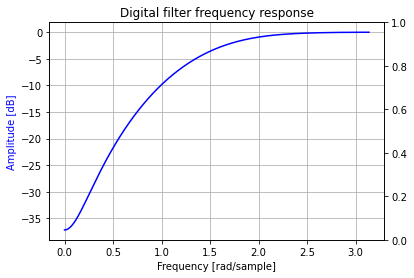

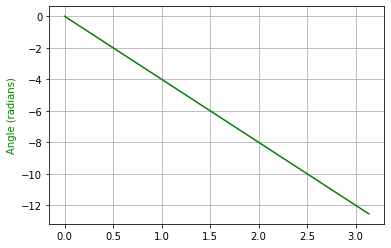

In [35]:
from scipy import signal
import numpy as np
b = signal.firwin(9, 400, window='hamming', pass_zero="highpass", fs=2000)
w, h = signal.freqz(b)
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.grid()
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
fig, ax2 = plt.subplots()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

In [110]:
import sympy as sp
import math
# 2017re B.2 phase
num = [0.1370, -0.1592, 0.16677, -0.1592, 0.1378]
den = [1]

zeros = np.roots(num)

samples = 24*10**3
#omega = np.linspace(0, 24*10**3, samples)
omega = np.arange(0, 24*10**3)
h = np.zeros(samples)

for i in range(samples):
    zerosSum = 0
    for zero in zeros:
        oi = omega[i]
        zerosSum += sp.atan((sp.sin(oi)-zero.real)/(sp.cos(oi)-zero.imag))
    h[i] = -zerosSum - 0

fig, ax = plt.subplots(figsize=(20,5))
ax.axes.set_aspect('equal')
ax.grid()
ax.set_xlim(0,10)
ax.set_xticks(ticks=np.arange(0,10, 0.5))
ax.set_yticks(ticks=np.arange(-3,4, 0.5))
ax.plot(omega,h)

KeyboardInterrupt: 

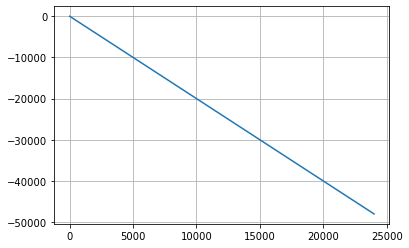

In [113]:
M = 4
x = np.arange(0, 24*10**3)
y = x*(-M/2)

fig, ax = plt.subplots()
ax.grid()
ax.plot(x,y)
